In [1]:
%load_ext autoreload
%autoreload 2

In [70]:
import numpy as np
import scipy
import networkx
import matplotlib.pyplot as plt
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

import warnings
warnings.filterwarnings('ignore')

# Goal: 
- write code for generating a simple network (start from just one household size, random extra edges)

In [18]:
from seirsplus.networks import generate_simplified_network

In [44]:
WEIGHT = 10
LoD=174
POOL_SIZE=10
NUM_SCREENING_GROUPS = 1
ALPHA=10
INIT_PREV = 0.001

In [45]:
N=1000
household_size=10
p_random_edge=0.01

In [46]:
G, households_dict = generate_simplified_network(N, household_size, p_random_edge)

In [47]:
# assign higher weights to intra-household edges

import copy
G_weighted = copy.deepcopy(G)

for node, household in households_dict.items():
    for j in household:
        G[node][j]["weight"] = WEIGHT
        G_weighted[node][j]["weight"] = 10**10

In [48]:
G[0][1]

{'weight': 10}

In [49]:
G_weighted[0][1]

{'weight': 10000000000}

Text(0.5, 1.0, 'Degree distribution')

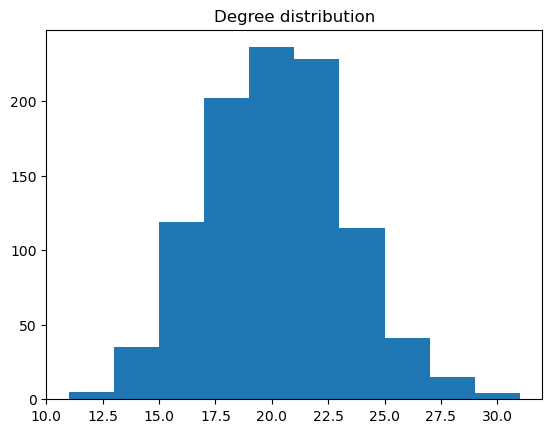

In [111]:
plt.hist([G.degree[i]-1 for i in range(N)])
plt.title("Degree distribution") # centered at 10+1000*0.01=20, as expected

In [59]:
def run_sim(
    G,
    G_weighted,
    households_dict,
    ALPHA,
    N,
    INIT_PREV,
    T,
    pooling_strategy,
    NUM_SCREENING_GROUPS,
    POOL_SIZE,
    LoD,
    seed=0,
):
    test_model = ViralExtSEIRNetworkModel(
        G = G,
        G_weighted = G_weighted,
        households_dict=households_dict,
        beta = 0.1,
        beta_Q = 0,
        sigma = 0.2,
        lamda = 0.5,
        gamma  = 0.25,
        seed = 0,
        alpha = ALPHA,
        transition_mode="time_in_state",
        initE = N*INIT_PREV,
        verbose=1
    )
    sim = SimulationRunner(
        model=test_model,
        pooling_strategy=pooling_strategy,
        T = T,
        # num_groups = 10,
        num_groups = NUM_SCREENING_GROUPS,
        pool_size = POOL_SIZE,
        LoD=LoD,
        seed = seed,
        save_results=False,
        verbose=2,
        max_dt=0.01,
    )
    sim.run_simulation()

    return sim

In [74]:
sim_correlated = run_sim(
    G,
    G_weighted,
    households_dict,
    ALPHA,
    N,
    INIT_PREV,
    T=10,
    pooling_strategy='correlated',
    NUM_SCREENING_GROUPS=NUM_SCREENING_GROUPS,
    POOL_SIZE=POOL_SIZE,
    LoD=LoD,
    seed=0,
)


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Running simulation with seed 0 for strategy correlated...
Running screening for group 0 on day 0...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Screening day:  0  self.model.t:  0.01
Running screening for group 0 on day 1...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


Screening day:  1  self.model.t:  1.0000000000000007
    Nodes with transition propensities:
        node926, in state [2], propensity [('EtoIPRE', 100000.0)]
-- node 926 is transitioning EtoIPRE at time 1.0000165427939314 with timer_state: [1.00001654]; 1/sigma: [1.]; VL: 0.0
{'t': 1.0000165427939314, 'transitionNode': 926, 'transitionNodeVL': 4.0, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node924, in state [1], propensity [('StoE', 0.9345794392523364)]
infected: 924, transmissionTerms_I: [10.], transmissionTerms_Q: [0.], household_neighbors: {928, 929, 920, 921, 922, 923, 925, 926, 927}, non_household_neighbors: [578, 388, 393, 244, 284, 760, 924, 285]
Household member states: [array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([3]), array([1])]
Non-household member states: [array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([2])

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.79it/s]


Screening day:  2  self.model.t:  2.00949906368338
    Nodes with transition propensities:
        node920, in state [1], propensity [('StoE', 0.9345794392523364)]
infected: 920, transmissionTerms_I: [10.], transmissionTerms_Q: [0.], household_neighbors: {928, 929, 921, 922, 923, 924, 925, 926, 927}, non_household_neighbors: [98, 232, 974, 915, 920, 151, 952, 62]
Household member states: [array([2]), array([1]), array([2]), array([2]), array([1]), array([2]), array([2]), array([3]), array([1])]
Non-household member states: [array([1]), array([1]), array([1]), array([1]), array([2]), array([1]), array([1]), array([1])]
Infected node 920 got contribution from infectious contacts {926: 1.0} and quarantined contacts {}
{'t': 2.062914624494579, 'transitionNode': 920, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
propensity: 0.9345794392523364, sum of all propensities: 3.8288246691456553
    Nodes with transition propensities:
        node924, in state [2], propensity [('EtoIPRE', 10000

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Screening day:  3  self.model.t:  3.0065520286863903
    Nodes with transition propensities:
        node920, in state [2], propensity [('EtoIPRE', 100000.0)]
-- node 920 is transitioning EtoIPRE at time 3.066553357829979 with timer_state: [1.00363873]; 1/sigma: [1.]; VL: 1.8945496167672857
{'t': 3.066553357829979, 'transitionNode': 920, 'transitionNodeVL': 4.0, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node927, in state [2], propensity [('EtoIPRE', 100000.0)]
-- node 927 is transitioning EtoIPRE at time 3.476564099090884 with timer_state: [1.00577591]; 1/sigma: [1.]; VL: 2.3830606925048112
{'t': 3.476564099090884, 'transitionNode': 927, 'transitionNodeVL': 4.0, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.0629198242
    Nodes with transition propensities:
        node929, in state [2], propensity [('EtoIPRE', 100000.0)]
-- node 929 is transitioning EtoIPRE a

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  5.07it/s]


Screening day:  4  self.model.t:  4.006576307464523
    Nodes with transition propensities:
        node926, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 926 is transitioning QPREtoQSYM at time 4.006579712761233 with timer_state: [3.00656317]; 1/lamda: [3.]; VL: 4.0
{'t': 4.006579712761233, 'transitionNode': 926, 'transitionNodeVL': 3.9970182901420044, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100000.24383698238
Running screening for group 0 on day 5...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]


Screening day:  5  self.model.t:  5.006579712761211
    Nodes with transition propensities:
        node924, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 924 is transitioning QPREtoQSYM at time 5.206612455247456 with timer_state: [3.00367806]; 1/lamda: [3.]; VL: 4.0
{'t': 5.206612455247456, 'transitionNode': 924, 'transitionNodeVL': 3.961117125289139, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node922, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 922 is transitioning QPREtoQSYM at time 5.266620251942341 with timer_state: [3.00366966]; 1/lamda: [3.]; VL: 4.0
{'t': 5.266620251942341, 'transitionNode': 922, 'transitionNodeVL': 1.0, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node925, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 925 is transitioning QPREtoQSYM 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


Screening day:  6  self.model.t:  6.006655057695965
    Nodes with transition propensities:
        node920, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 920 is transitioning QPREtoQSYM at time 6.066655299813466 with timer_state: [3.00010194]; 1/lamda: [3.]; VL: 4.0
{'t': 6.066655299813466, 'transitionNode': 920, 'transitionNodeVL': 3.996634817251547, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node927, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 927 is transitioning QPREtoQSYM at time 6.476655744914151 with timer_state: [3.00009165]; 1/lamda: [3.]; VL: 4.0
{'t': 6.476655744914151, 'transitionNode': 927, 'transitionNodeVL': 3.996760423666579, 'transitionType': 'QPREtoQSYM'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node929, in state [13], propensity [('QPREtoQSYM', 100000.0)]
-- node 929 is transitioni

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.63it/s]


Screening day:  7  self.model.t:  7.006659084689057
Running screening for group 0 on day 8...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.70it/s]


Screening day:  8  self.model.t:  8.006659084689035
Running screening for group 0 on day 9...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.90it/s]


Screening day:  9  self.model.t:  9.006659084689014


In [67]:
len(sim_correlated.model.infectionsLog)

9

Text(0.5, 1.0, 'Distribution of secondary infections per infectious case, CP')

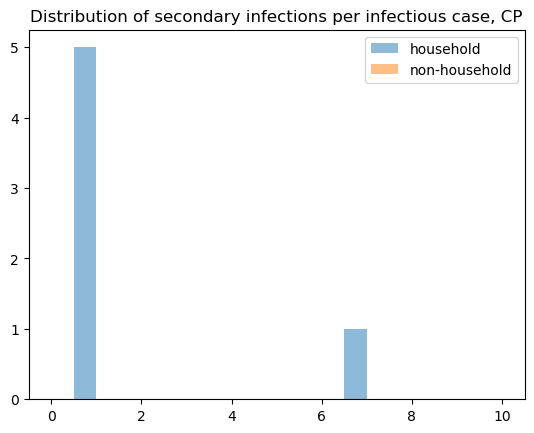

In [94]:
bins=np.linspace(0,10,21)
plt.hist(sim_correlated.model.sec_infs_household.values(), bins=bins, alpha=0.5, label="household")
plt.hist(sim_correlated.model.sec_infs_non_household.values(), bins=bins, alpha=0.5, label="non-household")
plt.legend()
plt.title("Distribution of secondary infections per infectious case, CP")

Text(0.5, 1.0, '# susceptible neighbors')

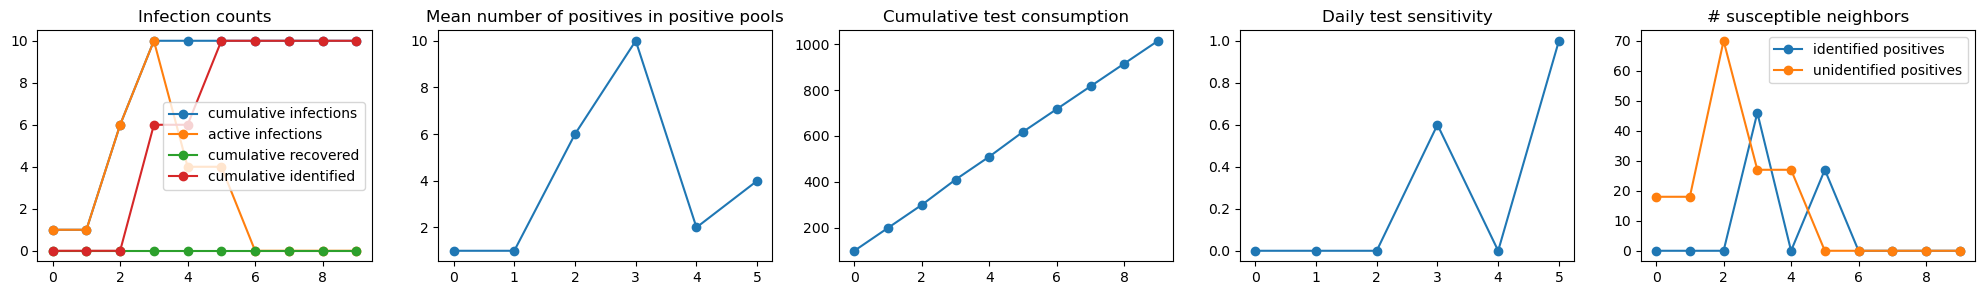

In [91]:
fig, axs = plt.subplots(1, 5, figsize=(25, 3))

sim = sim_correlated

axs[0].plot([sim.overall_results[i]["cumInfections"] for i in range(len(sim.overall_results))], "-o", label="cumulative infections")
axs[0].plot([sim.overall_results[i]["numActiveInfections"] for i in range(len(sim.overall_results))], "-o", label="active infections")
axs[0].plot([sim.overall_results[i]["cumRecovered"] for i in range(len(sim.overall_results))], "-o", label="cumulative recovered")
axs[0].plot([sim.overall_results[i]["cum_positives_identified"] for i in range(len(sim.overall_results))], "-o", label="cumulative identified")
axs[0].legend()
axs[0].set_title("Infection counts")

axs[1].plot([sim.overall_results[i]["mean_num_positives_in_positive_pool"] for i in range(len(sim.overall_results))], "-o", label="mean_num_positives_in_positive_pool")
axs[1].set_title("Mean number of positives in positive pools")

axs[2].plot([sim.overall_results[i]["cum_num_tests"] for i in range(len(sim.overall_results))], "-o", label="cum_num_tests")
axs[2].set_title("Cumulative test consumption")

axs[3].plot([sim.overall_results[i]["daily_sensitivity"] for i in range(len(sim.overall_results))], "-o", label="daily_sensitivity")
axs[3].set_title("Daily test sensitivity")

axs[4].plot([sim.overall_results[i]["num_susceptible_neighbors_of_identified_positives"] for i in range(len(sim.overall_results))], "-o", label="identified positives")
axs[4].plot([sim.overall_results[i]["num_susceptible_neighbors_of_unidentified_positives"] for i in range(len(sim.overall_results))], "-o", label="unidentified positives")
axs[4].legend()
axs[4].set_title("# susceptible neighbors")

In [72]:
sim_naive = run_sim(
    G,
    G_weighted,
    households_dict,
    ALPHA,
    N,
    INIT_PREV,
    T=10,
    pooling_strategy='naive',
    NUM_SCREENING_GROUPS=NUM_SCREENING_GROUPS,
    POOL_SIZE=POOL_SIZE,
    LoD=LoD,
    seed=0,
)


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Running simulation with seed 0 for strategy naive...
Running screening for group 0 on day 0...
Screening day:  0  self.model.t:  0.01
Running screening for group 0 on day 1...
Screening day:  1  self.model.t:  1.0000000000000007
    Nodes with transition propensities:
        node926, in state [2], propensity [('EtoIPRE', 100000.0)]
-- node 926 is transitioning EtoIPRE at time 1.0000003918256388 with timer_state: [1.00000039]; 1/sigma: [1.]; VL: 0.0
{'t': 1.0000003918256388, 'transitionNode': 926, 'transitionNodeVL': 4.0, 'transitionType': 'EtoIPRE'}
propensity: 100000.0, sum of all propensities: 100000.0
    Nodes with transition propensities:
        node923, in state [1], propensity [('StoE', 0.9523809523809523)]
infected: 923, transmissionTerms_I: [10.], transmissionTerms_Q: [0.], household_neighbors: {928, 929, 920, 921, 922, 924, 925, 926, 927}, non_household_neighbors: [99, 227, 562, 758, 248, 923]
Household member states: [array([1]), array([1]), array([1]), array([1]), array([

Text(0.5, 1.0, 'Distribution of secondary infections per infectious case, NP')

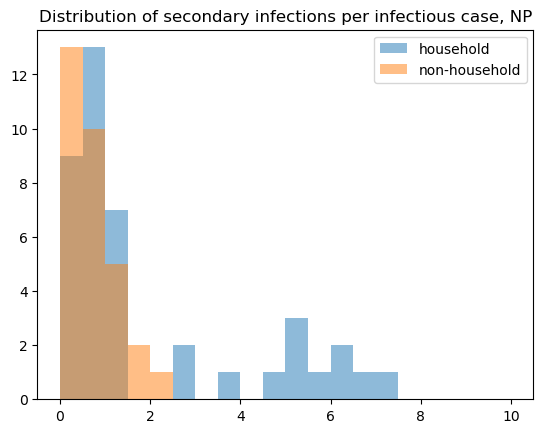

In [93]:
bins=np.linspace(0,10,21)
plt.hist(sim_naive.model.sec_infs_household.values(), bins=bins, alpha=0.5, label="household")
plt.hist(sim_naive.model.sec_infs_non_household.values(), bins=bins, alpha=0.5, label="non-household")
plt.legend()
plt.title("Distribution of secondary infections per infectious case, NP")

Text(0.5, 1.0, '# susceptible neighbors')

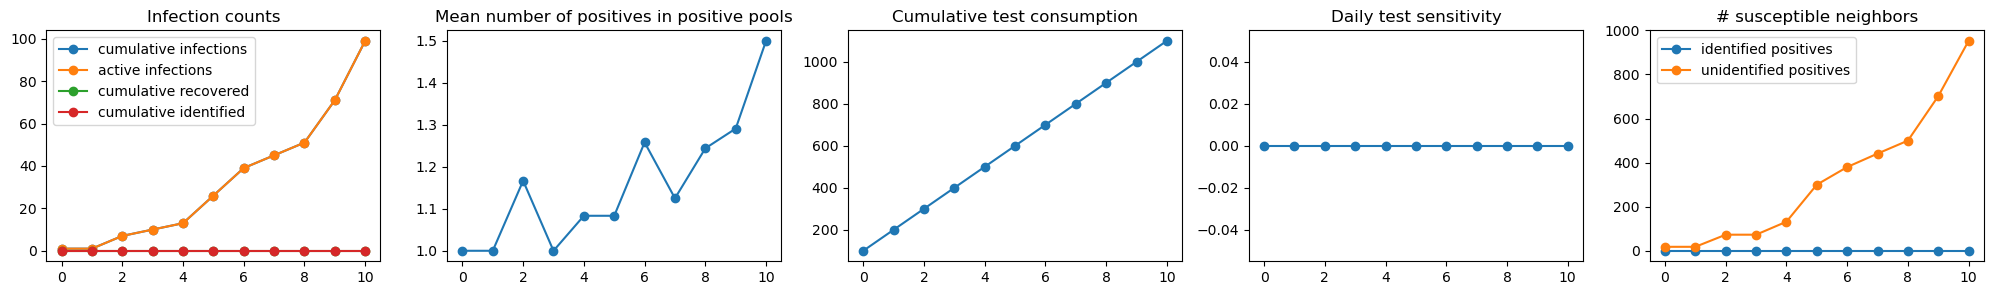

In [92]:
fig, axs = plt.subplots(1, 5, figsize=(25, 3))

sim = sim_naive

axs[0].plot([sim.overall_results[i]["cumInfections"] for i in range(len(sim.overall_results))], "-o", label="cumulative infections")
axs[0].plot([sim.overall_results[i]["numActiveInfections"] for i in range(len(sim.overall_results))], "-o", label="active infections")
axs[0].plot([sim.overall_results[i]["cumRecovered"] for i in range(len(sim.overall_results))], "-o", label="cumulative recovered")
axs[0].plot([sim.overall_results[i]["cum_positives_identified"] for i in range(len(sim.overall_results))], "-o", label="cumulative identified")
axs[0].legend()
axs[0].set_title("Infection counts")

axs[1].plot([sim.overall_results[i]["mean_num_positives_in_positive_pool"] for i in range(len(sim.overall_results))], "-o", label="mean_num_positives_in_positive_pool")
axs[1].set_title("Mean number of positives in positive pools")

axs[2].plot([sim.overall_results[i]["cum_num_tests"] for i in range(len(sim.overall_results))], "-o", label="cum_num_tests")
axs[2].set_title("Cumulative test consumption")

axs[3].plot([sim.overall_results[i]["daily_sensitivity"] for i in range(len(sim.overall_results))], "-o", label="daily_sensitivity")
axs[3].set_title("Daily test sensitivity")

axs[4].plot([sim.overall_results[i]["num_susceptible_neighbors_of_identified_positives"] for i in range(len(sim.overall_results))], "-o", label="identified positives")
axs[4].plot([sim.overall_results[i]["num_susceptible_neighbors_of_unidentified_positives"] for i in range(len(sim.overall_results))], "-o", label="unidentified positives")
axs[4].legend()
axs[4].set_title("# susceptible neighbors")

In [66]:
len(sim_naive.model.infectionsLog)

99